### Laboratorium 12 - Ekstrakcja cech z utworów muzycznych, librosa
### Łukasz Kochańczyk, gr. 1

# 9. Manualna ekstrakcja cech z utworów muzycznych

## 9.1. Pobierz dane
Dane to 30-sekundowe próbki utworów z dziesięciu kategorii (gatunków). Oryginalny zbiór danych *gitzan* zawieraję po 100 fragmentów utworów każdej kategorii. Dane do obróbki podczas zajęć zostały zredukowane - do 10 utworów/kategorię. Plik zajmuje około 120MB.

In [1]:
!wget https://dysk.agh.edu.pl/s/Ewqj459KS6eTBd2/download -O gitzan_small.zip
!unzip gitzan_small.zip

--2024-05-28 22:30:21--  https://dysk.agh.edu.pl/s/Ewqj459KS6eTBd2/download
Resolving dysk.agh.edu.pl (dysk.agh.edu.pl)... 149.156.96.4, 2001:6d8:10:1060::6004
Connecting to dysk.agh.edu.pl (dysk.agh.edu.pl)|149.156.96.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘gitzan_small.zip’

gitzan_small.zip        [          <=>       ] 122.21M  24.5MB/s    in 5.7s    

2024-05-28 22:30:28 (21.6 MB/s) - ‘gitzan_small.zip’ saved [128150658]

Archive:  gitzan_small.zip
   creating: genres_original/
   creating: genres_original/blues/
  inflating: genres_original/blues/blues.00000.wav  
  inflating: genres_original/blues/blues.00001.wav  
  inflating: genres_original/blues/blues.00002.wav  
  inflating: genres_original/blues/blues.00003.wav  
  inflating: genres_original/blues/blues.00004.wav  
  inflating: genres_original/blues/blues.00005.wav  
  inflating: genres_original/blues/blues.00006.wav  
  inflating: genres_origina

Możesz odtworzyć wybrany utwór...

In [2]:
import IPython.display as ipd

audio_path = 'genres_original/blues/blues.00008.wav'
ipd.Audio(audio_path)

Będziemy używali biblioteki librosa do przetwarzania danych audio.

Zmienna sr to *sampling rate* (czestość próbkowania). Standardem jest 44100, ale librosa przyjmuje defaultową wartość 22050, co odpowiada pasmu przenoszenia do 10kHz.

In [3]:
import numpy as np
import librosa

audio_path = 'genres_original/blues/blues.00000.wav'
x, sr = librosa.load(audio_path)

print(x.shape, sr)
print(x.shape[0]/sr)

x, sr = librosa.load(audio_path, sr=44100)

print(x.shape, sr)
print(f'Długość nagrania: {x.shape[0]/sr} sec')

(661794,) 22050
30.013333333333332
(1323588,) 44100
Długość nagrania: 30.013333333333332 sec


## 9.2. Załaduj wszystkie pliki audio
Wszystkie pliki zostaną umieszczone w Pandas DataFrame. Nazwy folderów (i plików) odpowiadają gatunkom muzycznym.

**TODO 9.2.1**
1. Utwórz DataFrame przekazując w konstruktorze słownik, którego kluczami sa nazwy kolumn, a wartościami listy. Na przykład postaci
```{'nazwa1':lista1,'nazwa2':lista2}```
2. Nazwij kolumny: 'genre', 'file', 'audio', 'sr'


In [4]:
#load all
import numpy as np
import pandas as pd
import librosa

import os

root_folder = 'genres_original'
genres = []
audio_data = []
files = []
sampling_rates = []

for genre in os.listdir(root_folder):
    genre_folder = root_folder + '/' + genre
    for audio_file_path in os.listdir(genre_folder):
      fp = genre_folder + '/' + audio_file_path
      x, sr = librosa.load(fp)
      genres.append(genre)
      files.append(audio_file_path)
      audio_data.append(x)
      sampling_rates.append(sr)

df = pd.DataFrame({
    'genre': genres,
    'file': files,
    'audio': audio_data,
    'sr': sampling_rates
})
df.head(10)

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   
5  jazz  jazz.00009.wav  [0.08502197, 0.14257812, 0.15310669, 0.1674804...   
6  jazz  jazz.00000.wav  [-0.009246826, -0.011779785, -0.013702393, -0....   
7  jazz  jazz.00001.wav  [0.0024108887, 0.005493164, 0.008666992, 0.011...   
8  jazz  jazz.00004.wav  [0.122039795, 0.22442627, 0.19665527, 0.171508...   
9  jazz  jazz.00002.wav  [0.0033569336, 0.00491333, 0.0037841797, 0.004...   

      sr  
0  22050  
1  22050  
2  22050  
3  22050  
4  22050  
5  22050  
6  22050  
7  22050  
8  22050  
9  22050

In [5]:
# Sprawdź rozmiary df. Powinno być (100,4)
df.shape

(100, 4)

### 9.2.1 Dostęp do danych
Wybierz jeden z utworów i sprawdź, jak uzyskać dostęp do jego danych.

In [6]:
# czym jest df.audio[df.file=='blues.00000.wav']
s = df.audio[df.file == 'blues.00000.wav']
print(type(s))
print(s.shape)
print(s)

x = s.iloc[0]

print(x)
sr = df.sr[df.file == 'blues.00000.wav'].iloc[0]
print(sr)

<class 'pandas.core.series.Series'>
(1,)
62    [0.0073242188, 0.016601562, 0.0076293945, -0.0...
Name: audio, dtype: object
[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
22050


Wizualizacja przebiegu

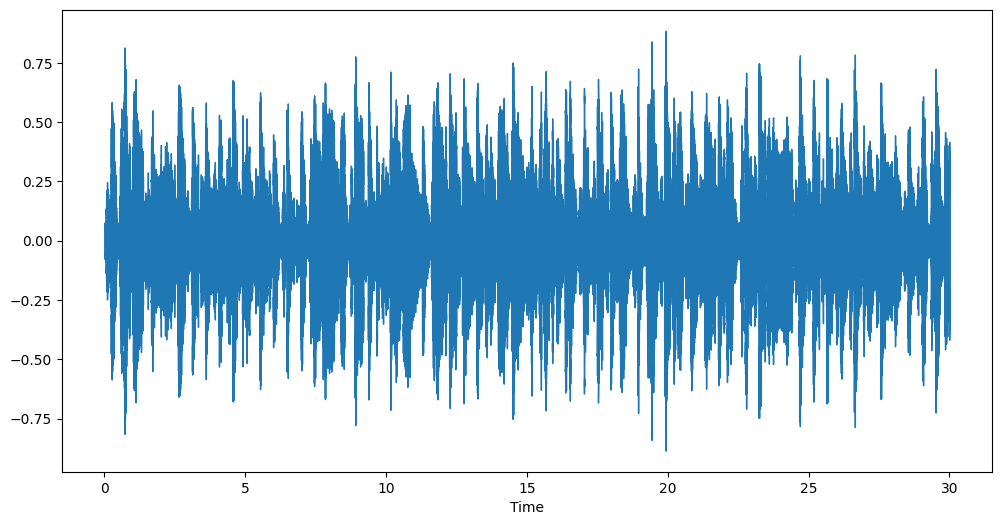

In [7]:
import matplotlib.pyplot as plt
import librosa.display

plt.rcParams["figure.figsize"] = (12, 6)
librosa.display.waveshow(x, sr=sr);

### 9.2.2 Transformacja FFT

Większość cech utworów muzycznych  jest ekstrahowana na podstawie analizy spektrum dźwięku i jego zmian. Do konwersji reprezentacji sygnału w dziedzinie czasu do dziedziny czestotliwości wykorzystywana jest szybka transformacja Fouriera.

Utworzymy przebieg będący superpozycją dwóch sinsusoid.

**TODO 9.2.2**
* Popraw poniższy kod, aby narysowany został fragment przebiegu pokazujacy sinusoidę....

(661500,)


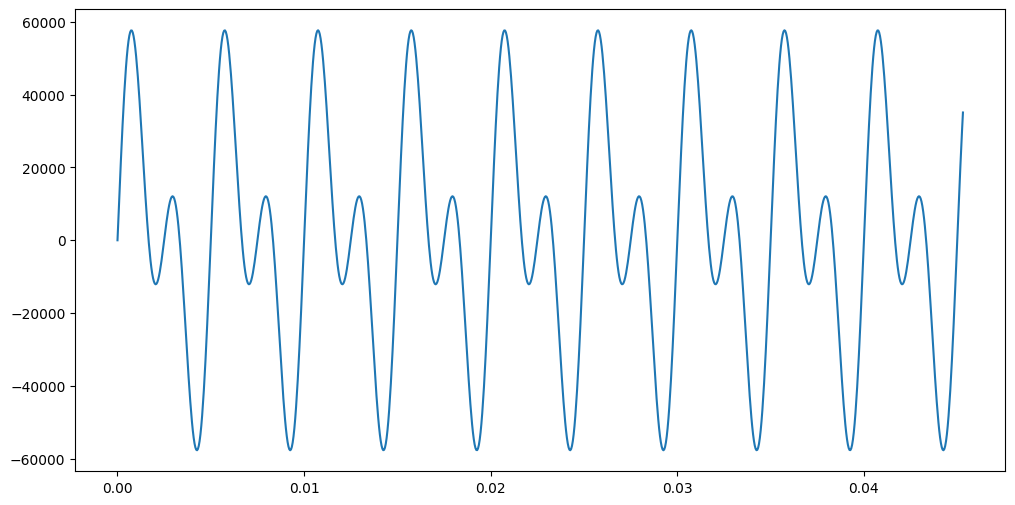

In [8]:
# około 30 sekund przy czasie próbkowania sr
# t=np.linspace(0,30,x.shape[0],endpoint=False)
t = np.linspace(0, 30, 30*22050, endpoint=False)
print(t.shape)
# sygnał 200 i 400 Hz
signal=np.sin(2*np.pi*200*t) + np.sin(2*np.pi*400*t)
signal=signal*(2**15)

N = 1000
plt.plot(t[0:N], signal[0:N])
plt.show()

Transformacja Fouriera zamienia sygnał w dziedzinie czasu na reprezentację w dziedzinie czestotliwości.

Narysujmy wynik transformacji.

**TODO 9.2.3**
* Co się stanie jeżeli zmniejszymy window_length? Np. do 1 sekundy (22050), trochę mniej niż sekundy (22000), około 93ms (2048)

###### Rozdzielczość czasowa będzie coraz lepsza, natomiast rozdzielczość częstotliwościowa coraz gorsza. Wizualnie kreski na wykresie będą coraz dalej od siebie.

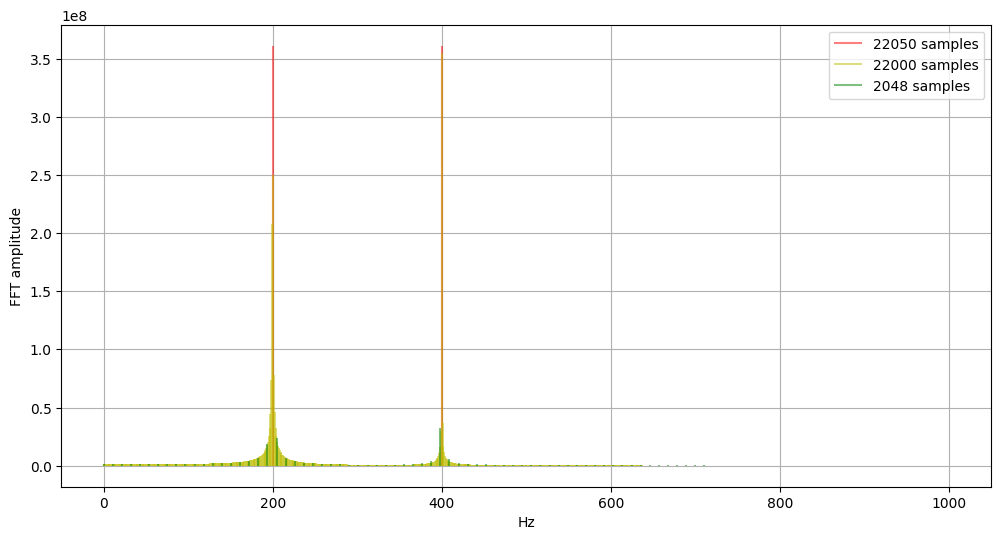

In [11]:
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

def plot_fft(signal, start, window_length, max_freq=11025, sr=22050, color='b', scale=1):
  y=signal[start:start+window_length]
  yf = fft(y)
  xf = fftfreq(window_length, 1 / sr)[:window_length//2]
  limit=xf[xf<=max_freq].shape[0]
  plt.vlines(xf[0:limit], np.zeros(limit),scale*np.abs(yf[0:limit]),colors=color,alpha=0.5)
  plt.grid()
  plt.xlabel('Hz')
  plt.ylabel('FFT amplitude')

# plot_fft(signal,start=0,window_length=signal.shape[0],max_freq=1000)
plot_fft(signal, start=0, window_length=22050, max_freq=1000, color='r')
plot_fft(signal, start=0, window_length=22000, max_freq=1000, color='y')
plot_fft(signal, start=0, window_length=2048, max_freq=1000, color='g')
plt.legend(['22050 samples', '22000 samples', '2048 samples'])
plt.show()

**TODO 9.2.4**
* Wydrukuj spektrum sygnału dla 3 punktów w czasie (różniacych się o kilkadziesiąt milisekund), używając róznych kolorów ('r', 'g', 'b'). Ile to będzie kilkadziesiąt milisekund?

Dla różnych momentów czasu rozkład czestotliwości powinien się zmieniać.

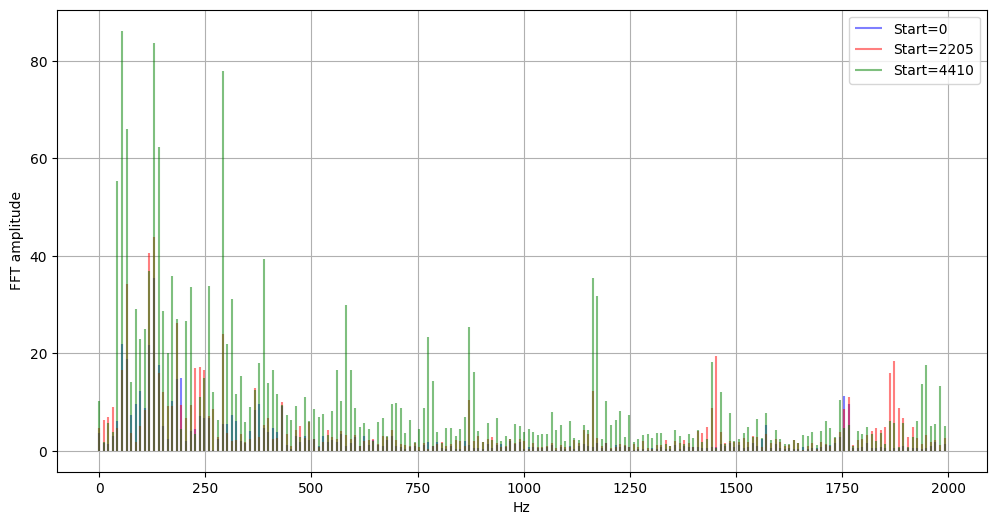

In [12]:
# x = df.audio[df.file=='blues.00000.wav']
# x = df.audio[df.file=='blues.00000.wav'].iloc[0]

# t=np.linspace(0,30,x.shape[0])
# noise=np.sin(2*np.pi*t*200)
# x=x+noise
# noise=np.sin(2*np.pi*t*400)
# x=x+noise

# plot_fft(x,4*22050,22050,1000,'b')
# # plot_fft(x,4*22050+2205,800,1000,'y',scale=1)
# plt.plot(t[0:500],noise[0:500])
# plt.show()

# print(type(x))
# for k in x:
#   print(k)
# plot_fft(x,200,2048,22050)
# print(x.iloc[0])
x = df.audio[df.file=='blues.00000.wav'].iloc[0]

START_VALUE = 2205

plot_fft(x, start=0, window_length=2048, max_freq=2000, color='b')
plot_fft(x, start=START_VALUE, window_length=2048, max_freq=2000, color='r')
plot_fft(x, start=START_VALUE * 2, window_length=2048, max_freq=2000, color='g')

plt.legend(['Start=0', f'Start={START_VALUE}', f'Start={START_VALUE * 2}'])
plt.show()

### 9.2.3 Spektrogram

Funkcja stft zwraca reprezentację signał w dziedzinie czasu i czestotliwości poprzez wyznaczanie transformacji Fouriera dla kolejnych okien (mogą się nakładać) .

Cytując:




This function returns a complex-valued matrix D such that

* np.abs(D[f, t]) is the magnitude of frequency bin f at frame t, and

* np.angle(D[f, t]) is the phase of frequency bin f at frame t.

(1025, 1293)


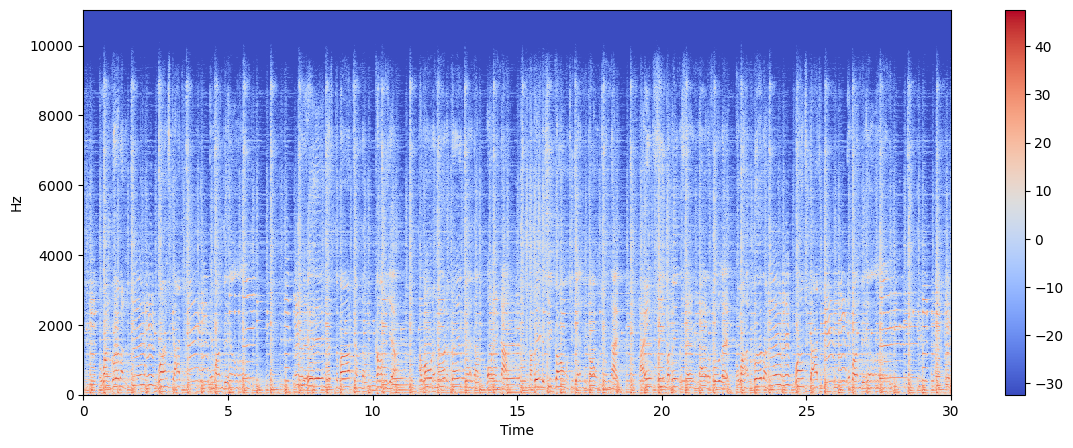

In [13]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

print(X.shape)

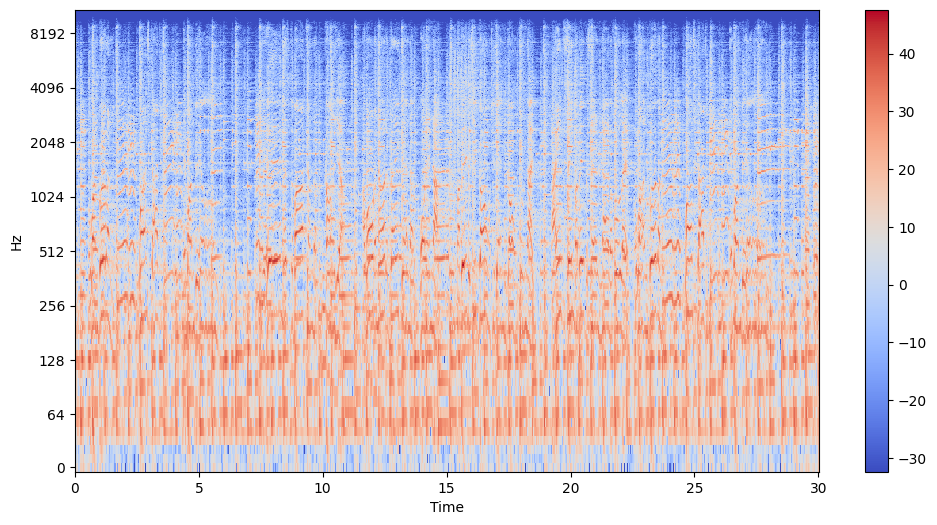

In [14]:
# zmiana na logarytmy
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();
plt.show()

Analiza rozmiarów spektrogramu. Ma on 1293 kolumny. Czyli 1293 razy wykonano transformację FFT.

**TODO 9.2.5**
* Oblicz przesunięcie pomiędzy oknami

In [ ]:
# Skok pomiedzy oknami FFT (hop_length) 511.600...
# print(f'Skok pomiędzy oknami: {??? * sr / ???} (tak naprawdę 512)')

**TODO 9.2.6**

Narysuj diagram częstotliwości dla czasu t=5sec.

* częstość próbkowania sr=22050
* standardowa wielkośc przesunięcia okna dla funkcji stft  512
* która to będzie kolumna?

(1025, 1293)
Col = 215
(1025,)


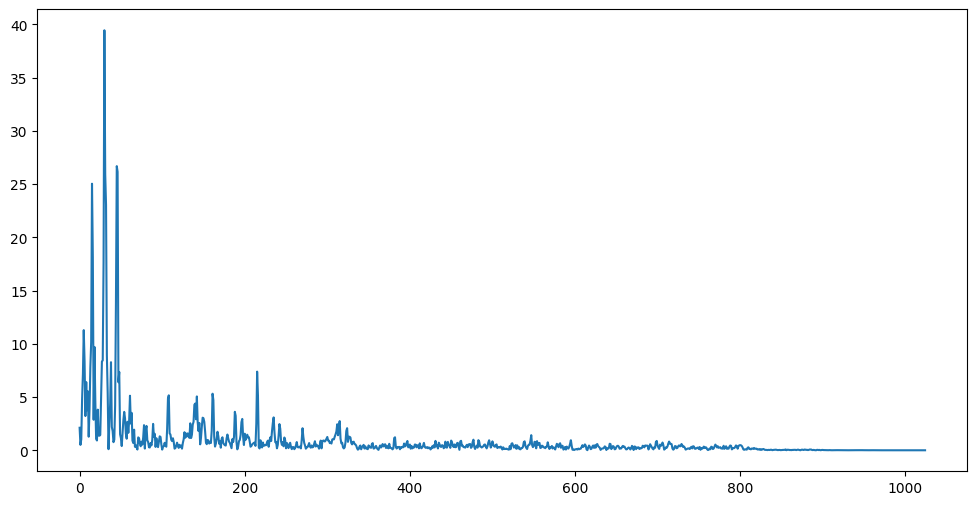

In [15]:
X = librosa.stft(x)
print(X.shape)

col = int((5 * 22_050) / 512)
print(f'Col = {col}')
amp = X[:, col]

amp = np.abs(amp)
print(amp.shape)

plt.plot(np.arange(amp.shape[0]), amp)
plt.show()

## 9.3. Wyznaczanie cech

Dla każdego nagrania wyznaczymy następujące cechy:
* Zero crossing rate
* Spectral centroid
* RMS
* MEL Frequency Cepstral Coefficients
* Chroma frequenices
* Tempo

Cechy te zostaną dodane jako kolumny do DataFrame. Wyznaczone zostaną wartości średnie i wariancje (w większości przypadków)


### 9.3.1 Zero crossing rate

Ile razy wykres przechodzi przez zero? Zwykle ma większe wartości dla utworów z dominującą perkusją.

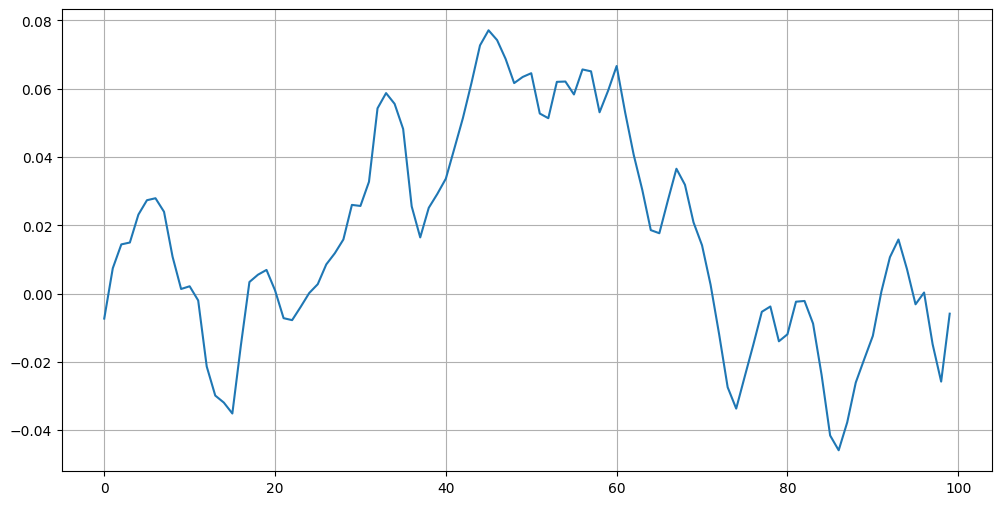

In [16]:
plt.plot(x[300:400])
plt.grid()

In [17]:
zero_crossings = librosa.zero_crossings(x[300:400], pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False  True False False False False False False False False False  True
 False False False False False  True False False False  True False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False  True False False False  True
  True  True False False]
10


Napiszemy funkcję, która pełny wektor sygnału podziel na pewną liczbę fragmentów (```n_splits ```), obliczy dla każdego z nich wartości cech, a następnie wyznaczy wartość średnią i odchylenie standardowe.


In [18]:
def calculate_stats(x, compute_feature, n_splits):
  delta = x.shape[0]//n_splits
  ys = np.zeros(n_splits)
  for i in range(n_splits):
    if i<n_splits-1:
      y = compute_feature(x[i*delta:(i+1)*delta])
    else:
      y = compute_feature(x[i*delta:])
    ys[i]=y
  # print(ys)
  return ys.mean(), ys.std()

# print(x)
# x to jedna z wczesniej załadowanych tablic sygnału
calculate_stats(x, lambda z: librosa.zero_crossings(z, pad=False).sum()/z.shape[0], 10)

(0.08315264585719913, 0.010770225989245166)

Do funkcji ```calculate_stats``` przekazujemy obiekt funkcyjny ```compute_feature``` odpowiedzialny za obliczanie cechy. Może to być wyrażenie lambda.

* Tworzymy listę wartości średnich i odchyleń standardowych dla wszystkich plików
* Zamieniamy na ```ndarray```
* Dodajemy do DataFrame

**TODO 9.3.1**
Dodaj wariancję, czyli kwadrat std

In [19]:
z = [calculate_stats(x, lambda y: librosa.zero_crossings(y, pad=False).sum()/y.shape[0], 10) for x in df.audio]
z = np.array(z)
print(z.shape)

df['zero_crossing_rate_mean'] = z[:, 0]
df['zero_crossing_rate_var']= z[:, 1]
df.head()

(100, 2)


genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  
0  22050                 0.064916                0.016395  
1  22050                 0.057980                0.014359  
2  22050                 0.044694                0.010488  
3  22050                 0.048092                0.013442  
4  22050                 0.046328                0.014309

In [20]:
print(df.shape)
# powinno być (100,6)

(100, 6)


### 9.3.2 Spectral centroid

Cecha reprezentuje ważoną średnią częstotliwości obecnych w dźwieku. Wagą jest amplituda dla danej czestości.

In [21]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(1293,)

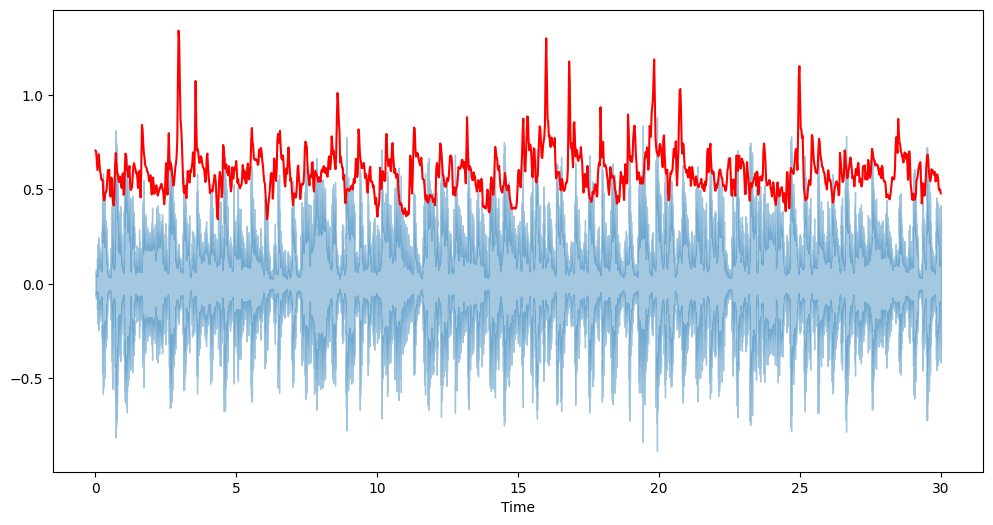

In [22]:
frames = range(len(spectral_centroids))

t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
spectral_centroids = spectral_centroids/(spectral_centroids.max() - spectral_centroids.min())

plt.plot(t, spectral_centroids, color='r');

Jak widać wartości zmieniają się w czasie. Policzymy średnie wartości i wariancje dla każdego utworu. Użyta funkcja calculate_stats standardowo dzieli utwór na 10 fragmentów.

**TODO 9.3.2**
* Dodaj do DataFrame kolumny 'spectral_centroid_mean' i 'spectral_centroid_var'

In [23]:
z = [calculate_stats(x, lambda z: librosa.feature.spectral_centroid(y=z, sr=sr)[0].mean(), 10) for x in df.audio]
z = np.array(z)

df['spectral_centroid_mean'] = z[:, 0]
df['spectral_centroid_var'] = z[:, 1] ** 2
df.head()

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  
0             1175.218609           25381.964957  
1             1275.544550          132877.806467  
2              817.025606           70047.373030  
3             1223.031342           86273.941069  
4             1306.914285           25038.420549

In [24]:
# Powinno być (100,8)
df.shape

(100, 8)

### 9.3.3.RMS
RMS (root mean square) to pierwiastek ze średniej kwadratów. Może zostać obliczony bezpośrednio z sygnału lub jego spektrogramu.

**TODO 9.3.3**
* Analogicznie jak w poprzednich punktach oblicz listę wartości wołając ```calculate_stats``` dla wszystkich ścieżek audio
* Dodaj kolumny 'rms_mean' i 'rms_var'

In [25]:
# lambda z: librosa.feature.spectral_centroid(y=z, sr=sr)[0].mean()
z = [calculate_stats(x, lambda z: librosa.feature.rms(y=z).mean(), 10) for x in df.audio]
z = np.array(z)

df['rms_mean'] = z[:, 0]
df['rms_var'] = z[:, 1]**2
df.head()

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  
0             1175.218609           25381.964957  0.093287  0.000518  
1             1275.544550          132877.806467  0.106932  0.000414  
2              817.025606           70047.373030  0.059116  0.000782  
3             1223.031342           86273.941069  0.098039  0.000175  
4             1306.914285           25038.420549  0.117847  0.000247

In [26]:
# Powinno być (100,10)
df.shape

(100, 10)

### 9.3.4 Spectral Rolloff

Cytując:
 *It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.*



(1293,)


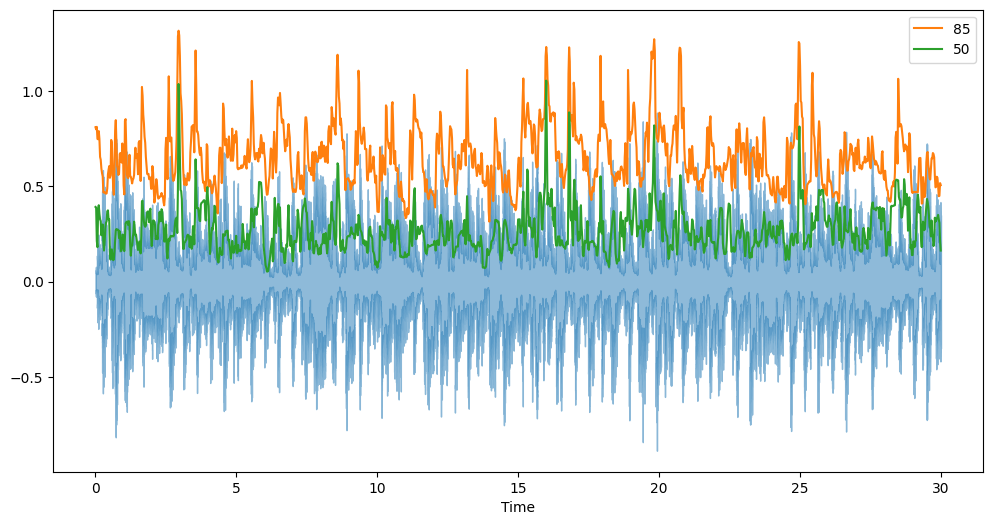

In [27]:
spectral_rolloff85 = librosa.feature.spectral_rolloff(y=x, sr=sr,roll_percent=0.85)[0]
print(spectral_rolloff85.shape)
frames = range(spectral_rolloff85.shape[0])

t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, alpha=0.5)

plt.plot(t, spectral_rolloff85/(spectral_rolloff85.max() - spectral_rolloff85.min()), label='85')
spectral_rolloff50 = librosa.feature.spectral_rolloff(y=x, sr=sr,roll_percent=0.50)[0]
plt.plot(t, spectral_rolloff50/(spectral_rolloff50.max() - spectral_rolloff50.min()), label='50')
plt.legend()
plt.show()

**TODO 9.3.4**
Analogicznie, jak w w punktach 3.1, 3.2 i 3.3. dodajemy cechy do df
* wołamy calculate_stats dla wszystkich plików przekazując funkcję obliczającą spectral_rolloff (ustawiamy sr=sr, roll_percent=0.85)
* Dodajemy kolumny 'spectral_rolloff_mean' i 'spectral_rolloff_var'


In [28]:
z = [calculate_stats(x, lambda z: librosa.feature.spectral_rolloff(y=z, sr=sr, roll_percent=0.85).mean(), 10) for x in df.audio]
z = np.array(z)

df['spectral_rolloff_mean'] = z[:, 0]
df['spectral_rolloff_var'] = z[:, 1] ** 2
df.head()

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  \
0             1175.218609           25381.964957  0.093287  0.000518   
1             1275.544550          132877.806467  0.106932  0.000414   
2              817.025606           70047.373030  0.059116  0.000782   
3             1223.031342           86273.941069  0.098039  0.000175   
4             1306.914285           25038.420549  0.117847  0.000247   

   spectral_rolloff_mean  spectral_rolloff_var  
0            1967.107797          1.116903e+05  
1            2504.700777          1.019295e+06  
2            1420.371488          2.447475e+05  
3            2420.944899          3.045182e+05  
4            2729.474290          8.064445e+04

In [29]:
# Powinno być (100,12)
df.shape

(100, 12)

### 9.3.5 Mel Frequency Cepstral Coefficients

Cechy te powiązane są z nieliniową wrażliwością na słyszane częstotliwości. Patrz: [szybkie wprowadzenie na medium.com](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)

Standardowo oblicza się 20 cech...

(20, 1293)


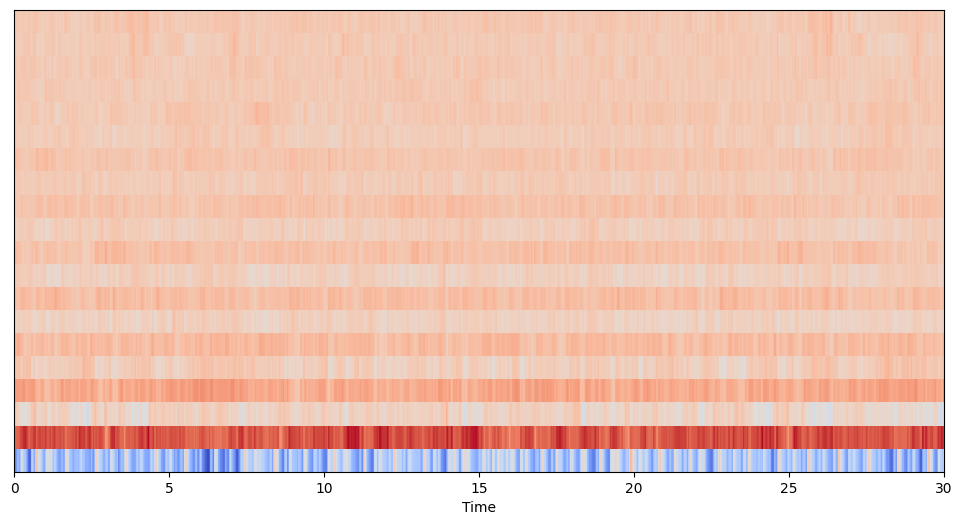

In [30]:
mfc = librosa.feature.mfcc(y=x, sr=sr)
print(mfc.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfc, sr=sr, x_axis='time');

In [31]:
# wartości średnie i wariancje cech
print(mfc.mean(axis=1))
print(mfc.std(axis=1)**2)

[-113.59882    121.57067    -19.162262    42.36394     -6.362266
   18.621931   -13.699734    15.339802   -12.274305    10.970944
   -8.326061     8.802088    -3.6699412    5.744675    -5.162783
    0.7517065   -1.687854    -0.4087299   -2.3026767    1.222467 ]
[2569.3696    295.8471    235.58446   151.03873   167.99289    89.172424
   67.60309    69.001495   82.21983    63.346542   61.76499    51.28075
   41.2159     40.517525   49.784233   52.424538   36.535862   41.603172
   55.053654   46.94135 ]


Czyli dla każdego utworu otrzymamy dwudziestoelementowe wektrory średnich i wariancji. Utworzymy 2 * 20 kolumn DataFrame - mfcc01_mean ... mfcc20_mean i mfcc01_var ... mfcc20_var

In [32]:
# przetwarzamy wszystkie cechy
def get_stats(mfc):
  return mfc.mean(axis=1), mfc.std(axis=1)**2

mfcs = [get_stats(librosa.feature.mfcc(y=x, sr=sr)) for x in df.audio]

Tworzymy słownik, którego kluczami są nazwy cech, a wartościami - listy zawierające elementy wyznaczone dla kolejnych utworów

**TODO 9.3.5**
* Dodaj zawartość słownika jako kolumny do DataFrame, np. wykonując: ```df[klucz]=pd.Series(wartość)```

In [34]:
dct = {}

for i in range(mfcs[0][0].shape[0]):
  dct[f'mfcc{i+1:02}_mean']=[]
  dct[f'mfcc{i+1:02}_var']=[]

for k in range(len(mfcs)):
  for i in range(mfcs[k][0].shape[0]):
    dct[f'mfcc{i+1:02}_mean'].append(mfcs[k][0][i])
  for i in range(mfcs[k][1].shape[0]):
    dct[f'mfcc{i+1:02}_var'].append(mfcs[k][1][i])


for k, arr in dct.items():
  df[k] = pd.Series(arr)

df.head()

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             1175.218609           25381.964957  0.093287  0.000518  ...   
1             1275.544550          132877.806467  0.106932  0.000414  ...   
2              817.025606           70047.373030  0.059116  0.000782  ...   
3             1223.031342           86273.941069  0.098039  0.000175  ...   
4             1306.914285           25038.420549  0.117847  0.000247  ...   

   mfcc16_mean  mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0     0.390247  393.005707    -1.470343  188.028519    -0.768643  215.575836   
1     7.081256  229.178543     0.882883  405.928711     0.974251  332.782074   
2    -1.885235   47.354237    -2.275575   54.609673     3.876387   38.860344   
3    -9.764631   56.463608    -4.477752   59.224556    -5.545833  105.164909   
4    -2.155805   45.153641    -4.238101   62.642567     1.845201   68.119919   

   mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
0    -6.323998  230.840805    -5.503818  210.654678  
1     1.727082  193.036606    -1.354072  212.845367  
2     0.342118   50.061325    -2.219153   56.314613  
3    -1.171263  149.539749    -1.099528  132.902847  
4    -0.444625   75.257233    -4.774384   64.655373  

[5 rows x 52 columns]

In [35]:
# Powinno być (100,52)
df.shape

(100, 52)

### 9.3.6 Częstości chromatyczne (Chroma Frequencies )

Reprezentują rozkład w widmie poszczególnych półtonów, np. A: 440HZ,880Hz, 1760Hz, itd.

Jest ich w sumie 12: C, C#, D, D#, E, F, F#, G, G#, A, A#, B

(12, 1293)


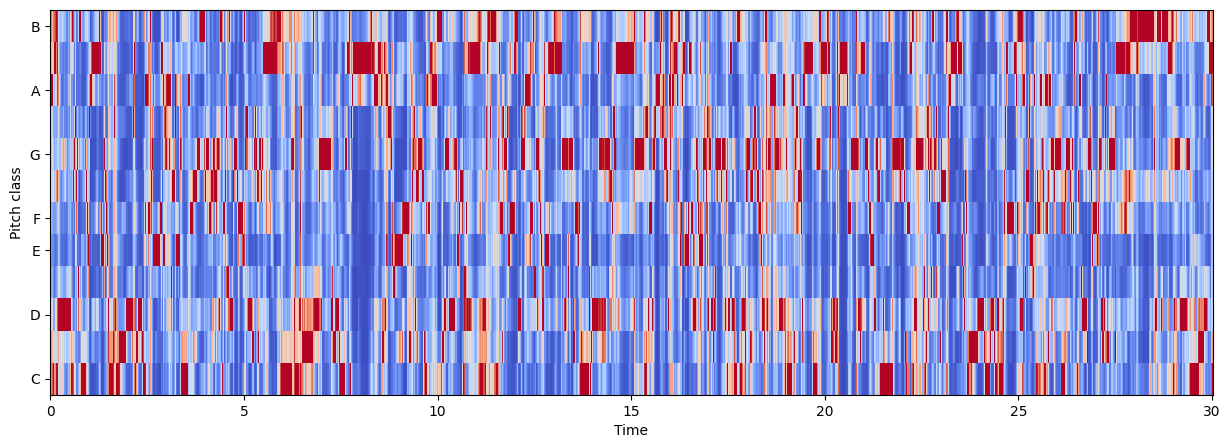

In [36]:
hop_length=512 #skok pomiędzy oknami
chroma = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
print(chroma.shape)

Sytuacja jest podobna do MFCC. Dla każdego utworu otrzymujemy tablicę z 12 wierszami (odpowiadającymi półtonom) i kolumnami odpowidajacymi oknom.

**TODO 9.3.6**
* Dodaj kolumny chroma01_mean, chroma_01_var ... chroma12_mean, chroma_12_var do DataFrame

In [37]:
chromas = [get_stats(librosa.feature.chroma_stft(y=x, sr=sr)) for x in df.audio]
dct = {}

for i in range(chromas[0][0].shape[0]):
  dct[f'chroma{i+1:02}_mean']=[]
  dct[f'chroma{i+1:02}_var']=[]

for k in range(len(chromas)):
  for i in range(chromas[k][0].shape[0]):
    dct[f'chroma{i+1:02}_mean'].append(chromas[k][0][i])
  for i in range(chromas[k][1].shape[0]):
    dct[f'chroma{i+1:02}_var'].append(chromas[k][1][i])

for k in dct:
  df[k] = pd.Series(dct[k])

df.head()

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             1175.218609           25381.964957  0.093287  0.000518  ...   
1             1275.544550          132877.806467  0.106932  0.000414  ...   
2              817.025606           70047.373030  0.059116  0.000782  ...   
3             1223.031342           86273.941069  0.098039  0.000175  ...   
4             1306.914285           25038.420549  0.117847  0.000247  ...   

   chroma08_mean  chroma08_var  chroma09_mean  chroma09_var  chroma10_mean  \
0       0.114212      0.050465       0.111901      0.052474       0.152322   
1       0.228149      0.075667       0.403985      0.157967       0.285059   
2       0.214405      0.024396       0.283093      0.089166       0.223196   
3       0.209759      0.056039       0.209229      0.076246       0.215152   
4       0.375309      0.091059       0.302256      0.059919       0.318650   

   chroma10_var  chroma11_mean  chroma11_var  chroma12_mean  chroma12_var  
0      0.045983       0.335170      0.171622       0.166403      0.055145  
1      0.077838       0.293305      0.122505       0.296452      0.102409  
2      0.030830       0.369777      0.087368       0.394549      0.106700  
3      0.067818       0.310599      0.107516       0.322208      0.129514  
4      0.067748       0.459829      0.116215       0.367748      0.071250  

[5 rows x 76 columns]

In [38]:
print(df.columns)
df.head()

Index(['genre', 'file', 'audio', 'sr', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'rms_mean', 'rms_var', 'spectral_rolloff_mean',
       'spectral_rolloff_var', 'mfcc01_mean', 'mfcc01_var', 'mfcc02_mean',
       'mfcc02_var', 'mfcc03_mean', 'mfcc03_var', 'mfcc04_mean', 'mfcc04_var',
       'mfcc05_mean', 'mfcc05_var', 'mfcc06_mean', 'mfcc06_var', 'mfcc07_mean',
       'mfcc07_var', 'mfcc08_mean', 'mfcc08_var', 'mfcc09_mean', 'mfcc09_var',
       'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean',
       'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var', 'chroma01_mean', 'chroma01_var',
       'chroma02_mean', 'chroma02_var', 'chroma03_mean', 'chroma03_var',
       'chroma04_mean'

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             1175.218609           25381.964957  0.093287  0.000518  ...   
1             1275.544550          132877.806467  0.106932  0.000414  ...   
2              817.025606           70047.373030  0.059116  0.000782  ...   
3             1223.031342           86273.941069  0.098039  0.000175  ...   
4             1306.914285           25038.420549  0.117847  0.000247  ...   

   chroma08_mean  chroma08_var  chroma09_mean  chroma09_var  chroma10_mean  \
0       0.114212      0.050465       0.111901      0.052474       0.152322   
1       0.228149      0.075667       0.403985      0.157967       0.285059   
2       0.214405      0.024396       0.283093      0.089166       0.223196   
3       0.209759      0.056039       0.209229      0.076246       0.215152   
4       0.375309      0.091059       0.302256      0.059919       0.318650   

   chroma10_var  chroma11_mean  chroma11_var  chroma12_mean  chroma12_var  
0      0.045983       0.335170      0.171622       0.166403      0.055145  
1      0.077838       0.293305      0.122505       0.296452      0.102409  
2      0.030830       0.369777      0.087368       0.394549      0.106700  
3      0.067818       0.310599      0.107516       0.322208      0.129514  
4      0.067748       0.459829      0.116215       0.367748      0.071250  

[5 rows x 76 columns]

In [39]:
# Powinno być (100,76)
df.shape

(100, 76)

### 9.3.7 Tempo utworu

Tempo utworu jest mierzone w [BPM (beats per minute)](https://en.wikipedia.org/wiki/Tempo) - czyli liczbie taktów na minutę. Okreslanie tempa opiera się na wykrywaniu  [początków nut (ang. onset detection)](https://en.wikipedia.org/wiki/Onset_(audio)), a następnie próbie dopasowania do nich tempa. [Więcej informacji](https://www.ee.columbia.edu/~dpwe/e4896/lectures/E4896-L10.pdf)

In [43]:
# Można to zrobić w jednym kroku przyjmujące standardowe wartości
x = df.audio[df.file == 'blues.00000.wav'].iloc[0]
tempo = librosa.feature.tempo(y=x)
print(tempo)

[123.046875]


In [44]:
# lub dostroić parametry
hop_length = 512 #wielkosć okna
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempo = librosa.feature.rhythm.tempo(onset_envelope=oenv, sr=sr, hop_length=hop_length)[0]
print(tempo)

123.046875


Poniżej kod i ilustracje z dokumentacji librosa. Poziome paski na tempogramie to wielokrotności taktów, ale też półnuty, ćwierćnuty, ósemki, itd.

In [45]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.feature.rhythm.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]

print(tempogram.shape)
print(tempo)

(384, 1293)
123.046875


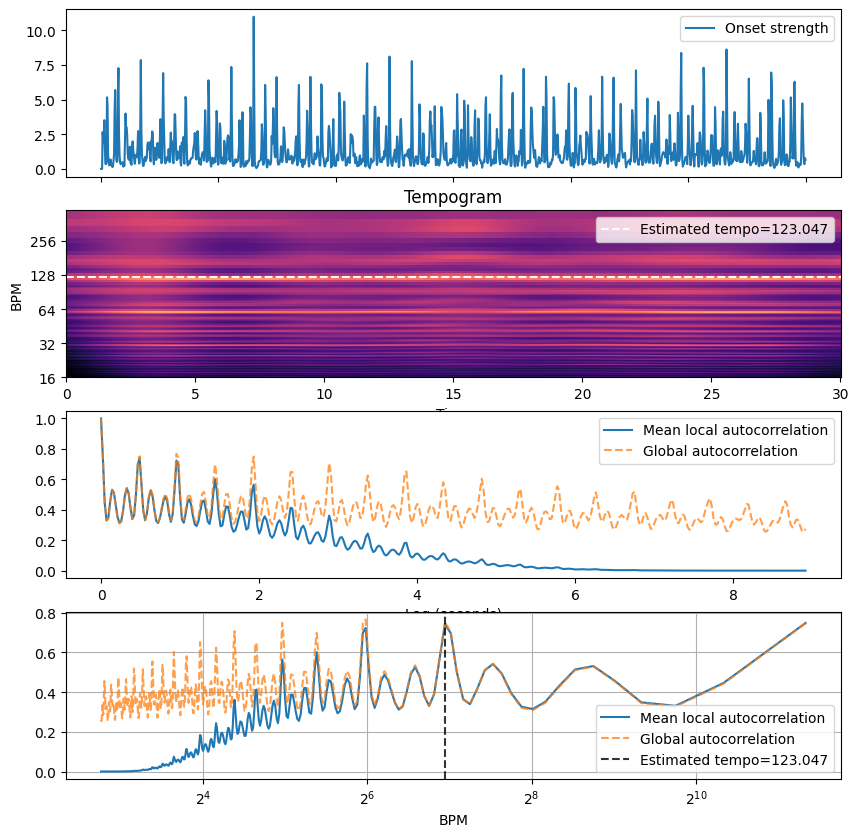

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)

ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)

librosa.display.specshow(
    tempogram, sr=sr, hop_length=hop_length,
    x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1]
)

ax[1].axhline(tempo, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')

x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])

ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)

freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)

ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1), label='Mean local autocorrelation', base=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75, label='Global autocorrelation', base=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8, label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

**TODO 9.3.7**
1. Utwórz listę wartości tempa dla wszystkich utworów w df.audio
2. Dodaj kolumnę `tempo`

In [47]:
tempos = [librosa.feature.rhythm.tempo(y=x)[0] for x in df.audio]
df['tempo'] = tempos
df.head()

genre            file                                              audio  \
0  jazz  jazz.00007.wav  [-0.02368164, -0.0335083, -0.022979736, -0.016...   
1  jazz  jazz.00005.wav  [0.06652832, 0.16467285, 0.2319336, 0.27746582...   
2  jazz  jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...   
3  jazz  jazz.00006.wav  [0.083343506, 0.14605713, 0.14706421, 0.158935...   
4  jazz  jazz.00008.wav  [0.056854248, 0.075653076, 0.040283203, 0.0259...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.064916                0.016395   
1  22050                 0.057980                0.014359   
2  22050                 0.044694                0.010488   
3  22050                 0.048092                0.013442   
4  22050                 0.046328                0.014309   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             1175.218609           25381.964957  0.093287  0.000518  ...   
1             1275.544550          132877.806467  0.106932  0.000414  ...   
2              817.025606           70047.373030  0.059116  0.000782  ...   
3             1223.031342           86273.941069  0.098039  0.000175  ...   
4             1306.914285           25038.420549  0.117847  0.000247  ...   

   chroma08_var  chroma09_mean  chroma09_var  chroma10_mean  chroma10_var  \
0      0.050465       0.111901      0.052474       0.152322      0.045983   
1      0.075667       0.403985      0.157967       0.285059      0.077838   
2      0.024396       0.283093      0.089166       0.223196      0.030830   
3      0.056039       0.209229      0.076246       0.215152      0.067818   
4      0.091059       0.302256      0.059919       0.318650      0.067748   

   chroma11_mean  chroma11_var  chroma12_mean  chroma12_var       tempo  
0       0.335170      0.171622       0.166403      0.055145   99.384014  
1       0.293305      0.122505       0.296452      0.102409  107.666016  
2       0.369777      0.087368       0.394549      0.106700  123.046875  
3       0.310599      0.107516       0.322208      0.129514  135.999178  
4       0.459829      0.116215       0.367748      0.071250  107.666016  

[5 rows x 77 columns]

**TODO 9.3.8**

Sprawdź liczbę wierszy i kolumn. Oczekiwany wynik (100,77)

In [48]:
df.shape

(100, 77)

## 4. Zapisz do pliku

**TODO 9.3.9**

Zapisz DataFrame do pliku 'gitzan_small_features.csv' i pobierz plik.




In [49]:
df.to_csv('gitzan_small_features.csv')